# Maximum Likelihood

Last lab we covered some basic parameters of interest, such as population mean and variance. In these cases, we had intuitive estimators (sample mean and sample variance). However in more interesting and real scenarios, we work with complex models for which we can't intuit parameter estimates. One way to estimate such parameters is through a systematic method called **Maximum Likelihood estimation**. 

Suppose we have a collection of independent random samples of random variables $X_1, X_2, ..., X_n$ from the same probability distribution, each with an associated PDF $p_\theta(x)$ which depends on some parameter $\theta$. The joint PDF is $p_\theta(x_1, x_2, ..., x_n) = p_\theta(x_1)p_\theta(x_2)...p_\theta(x_n)$. 

Once we've observed the data, we can substitute $x_1, x_2, ..., x_n$ by the actual values of the samples, so $p_\theta(x_1, x_2, ..., x_n)$ becomes a function of $\theta$ alone. Thus we can write, 

$L(\theta) = p_\theta(x_1, x_2, ..., x_n)$

This is called the **likelihood function**. The Maximum Likelihood Estimator of $\theta$ (MLE) is the value $\hat{\theta}$ that maximizes the likelihood. Since the likelihood function is a product, and products are typically hard to maximize, we usually take the logarithms (recall the logarithmic properties) and maximize the log-likelihood instead. 

---
##### Some Useful Logarithmic Properties

* **Product Rule** $\ln{(AB)} = \ln{(A)} + \ln{(B)}$
* **Quotient Rule** $\ln{(\frac{A}{B})} = \ln{(A)} - \ln{(B)}$
* **Power Rule** $\ln{(A^x)} = x\ln{(A)}$

---
#### Examples

1. (Single parameter optimization) We have a collection of random samples that are binomially distributed with probability 0.5. Let's pretend we don't know that they have probability $p=0.5$ and want to estimate said parameter. The likelihood function for the binomial distribution can be given by the following: $L(p) = p^x(1-p)^{n-x}$, where $x$ is the total number of successes and $n$ is the total number of samples. 

In R, we can use `optim()`, a general-purpose optimization method for calculating MLEs using various algorithms. 

**Using `optim()`:**

syntax: `optim(par, fn)`

arguments: 
* `par` Initial values for the parameters to be optimized over.
* `fn` A function to be minimized, with the first argument being the vector of parameters over which minimization is to take place. It should return a scalar result.

output:
* `par` The MLE set of parameters found.
* `value` The value of `fn` corresponding to `par`.
* `counts` The first value in the vector gives the number of calls to `fn`.

In [7]:
# draw 10 binomially-distributed samples with p=0.5

data1 <- rbinom(10, 1, 0.5)
x <- sum(data1) # number of heads
n <- length(data1) # number of samples
data1

[1] 0 1 0 1 0 0 0 0 0 0

In [8]:
# make likelihood function

binom_like <- function(p){
    L <- (p^x)*((1-p)^(n-x))
    return(L)
}

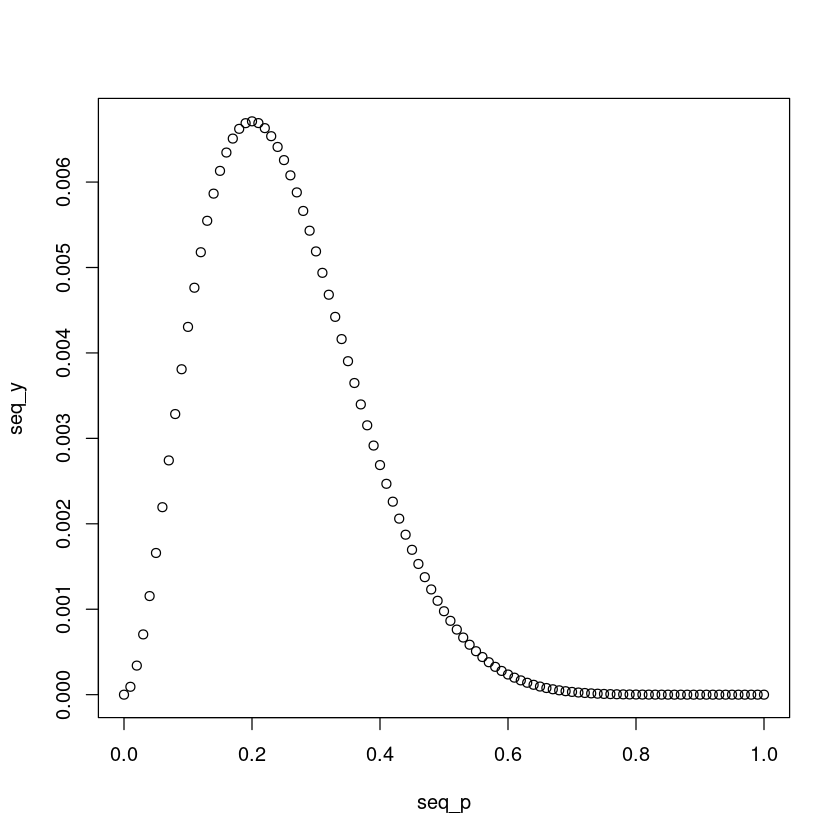

In [9]:
# plot the likelihood function for varying values of p

seq_p <- seq(0,1, by=0.01) # create a sequence of numbers from 0 to 1 with breaks of size 0.01
seq_y <- c()
for(s in seq_p){
  seq_y <- append(seq_y, binom_like(s)) # calculate the likelihood for every value in seq_p
}

plot(seq_p, seq_y)

In [10]:
# we can see which value gave us the maximum likelihood

ind <- which(seq_y == max(seq_y))
seq_p[ind]


[1] 0.2

In [14]:
# using the optim() function; **NOTE** need to change the sign of the likelihood function

binom_like <- function(p){
    L <- (p^x)*((1-p)^(n-x))
    return(-L)
}

res1 <- optim(mean(data1), binom_like)
res1

Warning message in optim(mean(data1), binom_like):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 0.2

$value
[1] -0.006710886

$counts
function gradient 
      22       NA 

$convergence
[1] 0

$message
NULL

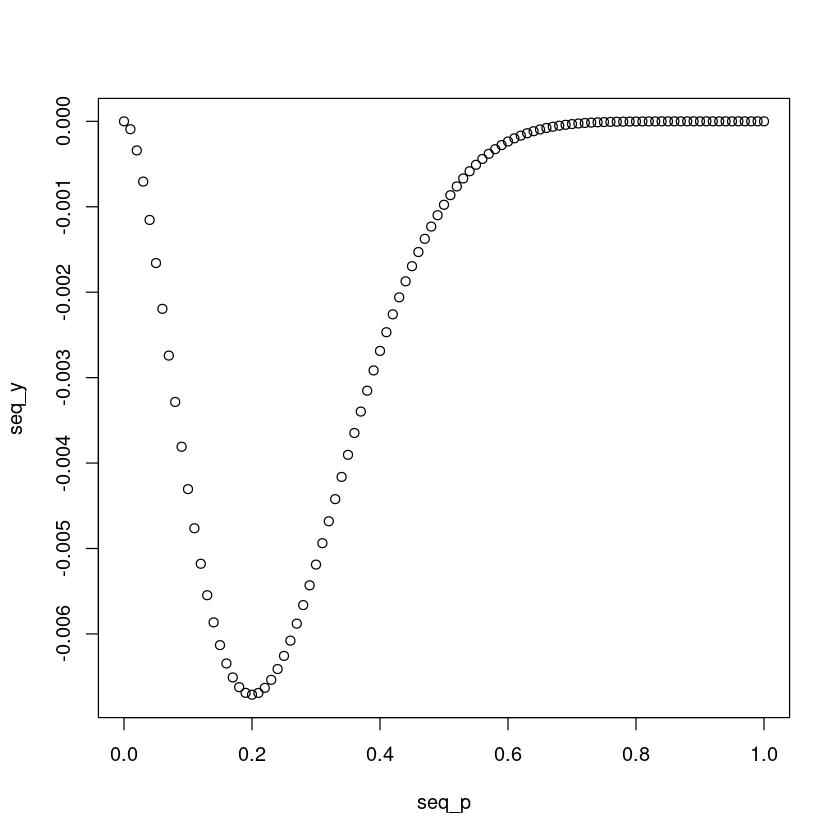

In [15]:
## an aside of what changing the sign does
# plot the likelihood function for varying values of p

seq_p <- seq(0,1, by=0.01) # create a sequence of numbers from 0 to 1 with breaks of size 0.01
seq_y <- c()
for(s in seq_p){
  seq_y <- append(seq_y, binom_like(s)) # calculate the likelihood for every value in seq_p
}

plot(seq_p, seq_y)

In [65]:
# what happens with different starting values?

optim(5, binom_like)

Warning message in optim(5, binom_like):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 0

$value
[1] 0

$counts
function gradient 
       8       NA 

$convergence
[1] 0

$message
NULL

In [41]:
# draw 1000 binomially-distributed samples with p=0.5

data2 <- rbinom(1000, 1, 0.5)
x <- sum(data2) # number of heads
n <- length(data2) # number of samples
x

[1] 512

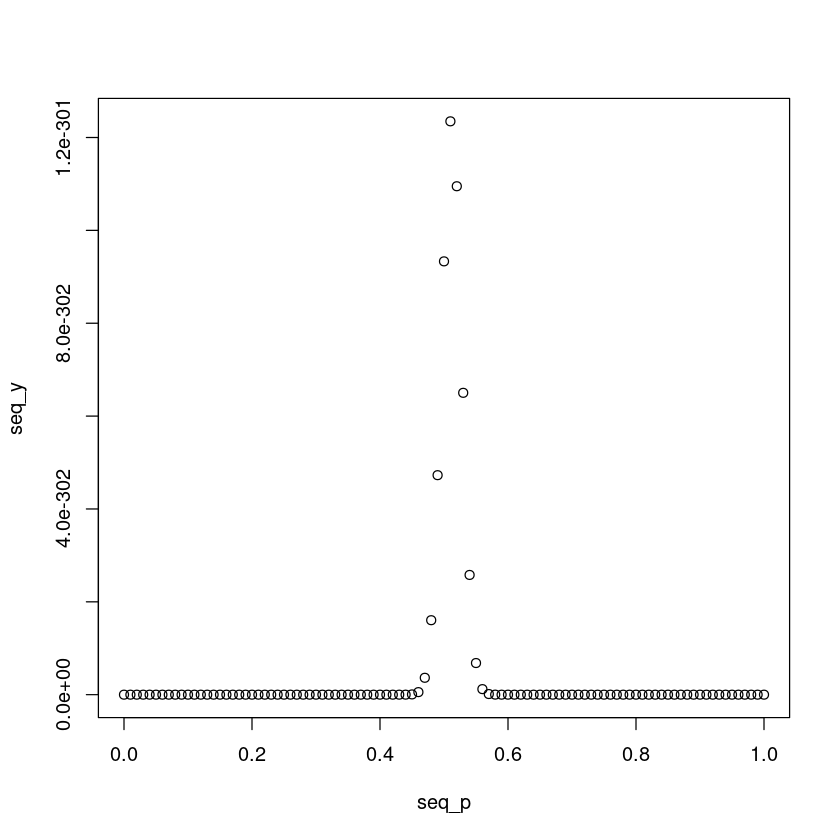

In [42]:
# plot the likelihood function for varying values of p

binom_like <- function(p){
    L <- (p^x)*((1-p)^(n-x))
    return(L)
}


seq_p <- seq(0,1, by=0.01) # create a sequence of numbers from 0 to 1 with breaks of size 0.01
seq_y <- c()
for(s in seq_p){
  seq_y <- append(seq_y, binom_like(s)) # calculate the likelihood for every value in seq_p
}

plot(seq_p, seq_y)

In [43]:
ind <- which(seq_y == max(seq_y))
seq_p[ind]

[1] 0.51

In [46]:
# using the optim() function; **NOTE** need to change the sign of the likelihood function
# with more samples, because the likelihood is a product, it becomes nearly impossible to actually maximize

binom_like <- function(p){
    L <- (p^x)*((1-p)^(n-x))
    return(-L)
}

optim(0.9, binom_like)


Warning message in optim(0.9, binom_like):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 0.9

$value
[1] 0

$counts
function gradient 
       2       NA 

$convergence
[1] 0

$message
NULL

In [48]:
# create log-likelihood function
# always want to take the log of the individual expression components and not the original likelihood function - it
# preserves accuracy that would be lost from rounding

binom_logLike <- function(p){
    logL <- x*log(p)+(n-x)*log(1-p)
    return(-logL)
}

res2 <- optim(0.9, binom_logLike)
res2



Warning message in optim(0.9, binom_logLike):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 0.5119629

$value
[1] 692.8592

$counts
function gradient 
      28       NA 

$convergence
[1] 0

$message
NULL

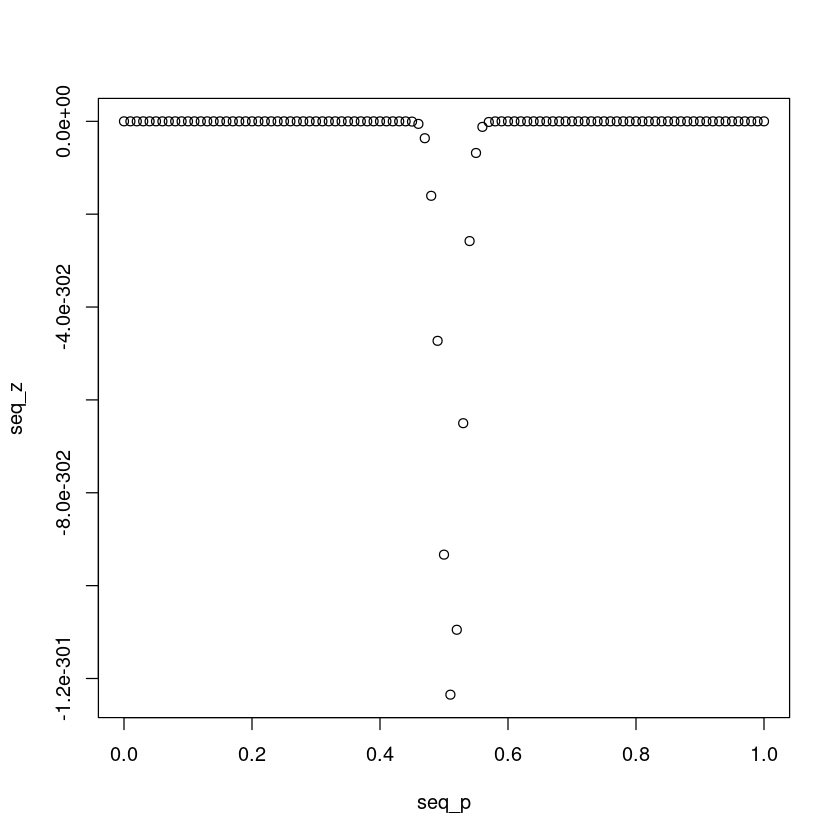

In [49]:
# changing to a log-scale doesn't affect the MLE

seq_p <- seq(0,1, by=0.01) # create a sequence of numbers from 0 to 1 with breaks of size 0.01
seq_z <- c()
for(s in seq_p){
  seq_z <- append(seq_z, binom_like(s)) # calculate the likelihood for every value in seq_p
}

plot(seq_p, seq_z)


In [50]:
# what about the log-likelihood on the original dataset of 20 samples?
x <- sum(data1)
n <- length(data1)

optim(0.9, binom_logLike)

Warning message in optim(0.9, binom_logLike):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”


$par
[1] 0.2000391

$value
[1] 5.004024

$counts
function gradient 
      32       NA 

$convergence
[1] 0

$message
NULL

In [31]:
res1

$par
[1] 0.2

$value
[1] -0.006710886

$counts
function gradient 
      22       NA 

$convergence
[1] 0

$message
NULL

#### Examples

2. (Multiple parameter optimization) Suppose we have 10 random samples drawn from a normal distribution, with unknown mean $\mu$ and variance $\sigma^2$. The log-likelihood function for the normal distribution is $L(\mu,\sigma^2) = -.5n\ln{(2\pi)}-.5n\ln{(\sigma^2)}-\frac{1}{2\sigma^2}\sum_i(y_i-\mu)^2$. Find the MLEs for both $\mu$ and $\sigma^2$.

In [37]:
data <- rnorm(10, 50, 2)
n <- length(data)

[1] 50.17391

In [38]:
# define the log-likelihood function

normal_logLike <- function(theta){
  mu <- theta[1]
  sigma2 <- theta[2]
  
  logL <- -.5*n*log(2*pi) -.5*n*log(sigma2) - (1/(2*sigma2))*sum((data-mu)**2)
  return(-logL)
}

In [39]:
optim(c(mean(data), var(data)), normal_logLike)


$par
[1] 50.173703  5.490678

$value
[1] 22.70491

$counts
function gradient 
      57       NA 

$convergence
[1] 0

$message
NULL

In [40]:
# contour plot the likelihood function for varying values of a, b
library(plotly)

mu_seq <- round(seq(min(data), max(data), by=0.01),2)
s2_seq <- seq(var(data)-1, var(data)+1, by=0.01)

grid_like <- matrix(NA, length(mu_seq),length(s2_seq))
for(i in 1:length(mu_seq)){
  for(j in 1:length(s2_seq)){
    grid_like[i,j] <- normal_logLike(c(mu_seq[i], s2_seq[j]))
  }
}

fig <- plot_ly(z = grid_like, type = 'contour', y = mu_seq, x = s2_seq, colorscale = 'Viridis')

fig

ERROR: Error in library(plotly): there is no package called ‘plotly’


### Questions

1. Suppose the weights of randomly selected American female college students are normally distributed with unknown mean  and standard deviation . A random sample of 10 American female college students yielded the following weights (in pounds):

115 122 130 127 149 160 152 138 149 180

Using the given sample, find a maximum likelihood estimate of $\mu$ and $\sigma^2$.

2. Suppose that the lifetime of Badger brand light bulbs is modeled by an exponential distribution with (unknown) parameter $\lambda$. We test 5 bulbs and find they have lifetimes of 2, 3, 1, 3, and 4 years, respectively. What is the MLE for $\lambda$?